In [15]:
a = {'a': 1, 'b': 2, 'c': 3}
b = {'d': 4}

In [16]:
c = a | b

In [17]:
c

{'a': 1, 'b': 2, 'c': 3, 'd': 4}

In [18]:
import pandas as pd

In [26]:
df = pd.DataFrame(columns=['d', 'r', 'p', 'shots', 'errors'])

In [15]:
import numpy as np
import scipy
import sinter
from scipy.stats import norm

def calc_per_round_ci(errors: int, shots: int, rounds: int, confidence: float = 0.95):
    per_shot = errors / shots
    per_round = calc_per_round(per_shot, rounds)
    
    # Standard error of the mean
    se_per_shot = np.sqrt(per_shot * (1 - per_shot) / shots)
    
    # Z-score for 95% confidence interval
    z_score = norm.ppf(0.975)  # 1.96
    
    # Calculate the upper and lower bounds of the per-shot error rate
    me_per_shot = z_score * se_per_shot
    per_shot_lower = per_shot - me_per_shot
    per_shot_upper = per_shot + me_per_shot
        
    # Calculate the confidence interval
    per_round_lower = 0.5 * (1 - (1 - 2 * per_shot_lower) ** (1 / rounds))
    per_round_upper = 0.5 * (1 - (1 - 2 * per_shot_upper) ** (1 / rounds))
    
    return per_round, per_round_lower, per_round_upper

def calc_per_round(per_shot: float, rounds: int):
    
    if per_shot >= 0.5:
         per_shot = 1 - per_shot
        
    return 0.5 * (1 - (1 - 2 * per_shot) ** (1/rounds))

In [35]:
calc_per_round(3/1e7, 30)

1.0000002881316306e-08

In [28]:
for i in np.arange(1, 10):
    n_shots = i*1e10
    p = 3/1e7
    errors = p * i
    per_round, l, u = calc_per_round_ci(errors=errors, shots=i, rounds=30)
    print(l/per_round, u/per_round)

-3573.680601018173 3583.107442451731
-2527.4481223488956 2533.1615389078906
-2063.7469349263 2068.2225450348933
-1787.2666972595935 1791.1234044954815
-1598.5619038169996 1602.0472694469481
-1459.2525615377433 1462.4903661396243
-1350.9736297183126 1354.034605025533
-1263.6875456721334 1266.6158990319507
-1191.3838571298365 1194.209060092286


In [6]:
help(calc_per_round)

Help on function calc_per_round in module __main__:

calc_per_round(per_shot: float, rounds: int)



[]

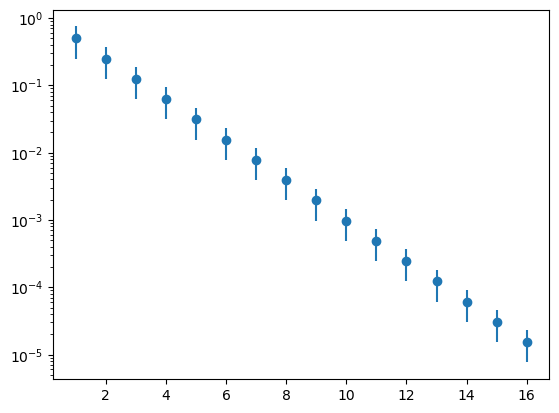

In [39]:
xvals = np.arange(1, 17)
yvals = 1/np.power(2, xvals)
yerror = 0.5 * yvals

import matplotlib.pyplot as plt
plt.errorbar(xvals, yvals, yerr=yerror, fmt='o')

plt.semilogy()

In [1]:
import stim

scl_noise = []

d = 3
r = d*2
scl_kwargs = {k: p for k in scl_noise}

circuit = stim.Circuit.generated("surface_code:rotated_memory_z", rounds=r, distance=d, **scl_kwargs)

for instr in circuit[::-1]:
    if isinstance(instr, stim.CircuitRepeatBlock):
        block = instr.body_copy()
        break
    
for instr in block:
    if instr.name == "CX":
        pairs = len(instr.targets_copy())
        print(pairs / 2)
        
        
print(pairs * 2)

6.0
6.0
6.0
6.0
24


In [ ]:
circuit.diagram("timeline-svg")

In [4]:
from src.noisemodel import split_circuit_cx_m


stim.Circuit('''
    TICK
    H 2 11 16 25
    TICK
    CX 2 3 16 17 11 12 15 14 10 9 19 18
    TICK
    CX 2 1 16 15 11 10 8 14 3 9 12 18
    TICK
    CX 16 10 11 5 25 19 8 9 17 18 12 13
    TICK
    CX 16 8 11 3 25 17 1 9 10 18 5 13
    TICK
    H 2 11 16 25
    TICK
    MR 2 9 11 13 14 16 18 25
    SHIFT_COORDS(0, 0, 1)
    DETECTOR(2, 0, 0) rec[-8] rec[-16]
    DETECTOR(2, 2, 0) rec[-7] rec[-15]
    DETECTOR(4, 2, 0) rec[-6] rec[-14]
    DETECTOR(6, 2, 0) rec[-5] rec[-13]
    DETECTOR(0, 4, 0) rec[-4] rec[-12]
    DETECTOR(2, 4, 0) rec[-3] rec[-11]
    DETECTOR(4, 4, 0) rec[-2] rec[-10]
    DETECTOR(4, 6, 0) rec[-1] rec[-9]
''')

In [18]:
from src.noisemodel import split_circuit

ModuleNotFoundError: No module named 'src'

In [19]:
(circuit_init, circuit_init_round, circuit_repeat_block, circuit_final), repeat_count = split_circuit(circuit)

SyntaxError: invalid syntax (2026637863.py, line 1)

In [1]:
import numpy as np

In [274]:
n = 30

X = np.arange(0, 10, 2)
Y = np.arange(0, 10, 2)
Z = np.arange(0, 20, 4)

coordinates = []
for i in range(n):
    x = np.random.choice(X)
    y = np.random.choice(Y)
    z = np.random.choice(Z)
    while (x, y, z) in coordinates:
        # print('collision')
        x = np.random.choice(X)
        y = np.random.choice(Y)
        z = np.random.choice(Z)
    else:
        coordinates.append((x, y, z))
    x /= 10
    y /= 10
    z /= 10
    print('\\'+f"node[circle, inner sep=.8pt, draw=black, fill=red] (x{i}a) at ({x}, {z}, {y})" + ' {};')
    print('\\'+f"node[circle, inner sep=.8pt, draw=black, fill=red] (x{i}b) at ({x}, {z+.1:.1f}, {y})" + ' {};')
    print('\\'+f'draw(x{i}a)--(x{i}b);')

\node[circle, inner sep=.8pt, draw=black, fill=red] (x0a) at (0.6, 1.2, 0.0) {};
\node[circle, inner sep=.8pt, draw=black, fill=red] (x0b) at (0.6, 1.3, 0.0) {};
\draw(x0a)--(x0b);
\node[circle, inner sep=.8pt, draw=black, fill=red] (x1a) at (0.6, 1.2, 0.8) {};
\node[circle, inner sep=.8pt, draw=black, fill=red] (x1b) at (0.6, 1.3, 0.8) {};
\draw(x1a)--(x1b);
\node[circle, inner sep=.8pt, draw=black, fill=red] (x2a) at (0.0, 1.2, 0.6) {};
\node[circle, inner sep=.8pt, draw=black, fill=red] (x2b) at (0.0, 1.3, 0.6) {};
\draw(x2a)--(x2b);
\node[circle, inner sep=.8pt, draw=black, fill=red] (x3a) at (0.4, 0.0, 0.8) {};
\node[circle, inner sep=.8pt, draw=black, fill=red] (x3b) at (0.4, 0.1, 0.8) {};
\draw(x3a)--(x3b);
\node[circle, inner sep=.8pt, draw=black, fill=red] (x4a) at (0.0, 1.2, 0.4) {};
\node[circle, inner sep=.8pt, draw=black, fill=red] (x4b) at (0.0, 1.3, 0.4) {};
\draw(x4a)--(x4b);
\node[circle, inner sep=.8pt, draw=black, fill=red] (x5a) at (0.6, 1.6, 0.0) {};
\node[circle, 

In [315]:
W = n + 10
m = 10

a = list(range(2, m+2))
p = np.array([1/(i**2) for i in a])
p = p / np.linalg.norm(p, ord=1)

coordinates = []
i = 0
while W > 0:
    i
    x = np.random.choice(X)
    y = np.random.choice(Y)
    z = np.random.choice(Z)
    while (x, y, z) in coordinates:
        x = np.random.choice(X)
        y = np.random.choice(Y)
        z = np.random.choice(Z)
    else:
        coordinates.append((x, y, z))
    x /= 10
    y /= 10
    z /= 10
    w = np.random.choice(a, p=p)
    W -= w
    print('\\'+f"node[circle, inner sep=.8pt, draw=black, fill=red] (x{i}a) at ({x}, {z}, {y})" + ' {};')
    print('\\'+f"node[circle, inner sep=.8pt, draw=black, fill=red] (x{i}b) at ({x}, {z+(.1 * w):.1f}, {y})" + ' {};')
    print('\\'+f'draw(x{i}a)--(x{i}b);')
    i += 1

\node[circle, inner sep=.8pt, draw=black, fill=red] (x0a) at (0.8, 0.0, 0.6) {};
\node[circle, inner sep=.8pt, draw=black, fill=red] (x0b) at (0.8, 0.6, 0.6) {};
\draw(x0a)--(x0b);
\node[circle, inner sep=.8pt, draw=black, fill=red] (x1a) at (0.8, 1.2, 0.2) {};
\node[circle, inner sep=.8pt, draw=black, fill=red] (x1b) at (0.8, 1.9, 0.2) {};
\draw(x1a)--(x1b);
\node[circle, inner sep=.8pt, draw=black, fill=red] (x2a) at (0.2, 0.4, 0.4) {};
\node[circle, inner sep=.8pt, draw=black, fill=red] (x2b) at (0.2, 0.6, 0.4) {};
\draw(x2a)--(x2b);
\node[circle, inner sep=.8pt, draw=black, fill=red] (x3a) at (0.2, 0.8, 0.4) {};
\node[circle, inner sep=.8pt, draw=black, fill=red] (x3b) at (0.2, 1.1, 0.4) {};
\draw(x3a)--(x3b);
\node[circle, inner sep=.8pt, draw=black, fill=red] (x4a) at (0.8, 1.2, 0.6) {};
\node[circle, inner sep=.8pt, draw=black, fill=red] (x4b) at (0.8, 1.4, 0.6) {};
\draw(x4a)--(x4b);
\node[circle, inner sep=.8pt, draw=black, fill=red] (x5a) at (0.2, 0.0, 0.6) {};
\node[circle, 

In [290]:
np.random.binomial(1, 0.5, 10)

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0])